In [7]:
import chess
import torch
from torch import nn
import numpy as np

from back import encryption_board, give_moves_prob
from models import SkyNetModel, Node

In [8]:
chessboard = chess.Board()
print(str(chessboard))

r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R


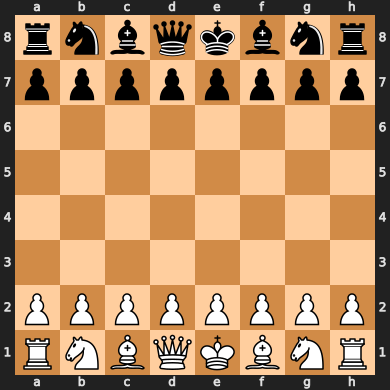

In [9]:
chessboard

In [10]:
SkyNet = SkyNetModel()

In [11]:
class MCTS:
    def __init__(self):
        self.root = Node()
        self.chessboard = chess.Board()
    #
    # def iteration_of_tree(self):
    #
    #     probability, value = SkyNet(encryption_board(self.chessboard))

In [12]:
encrypt_board, inp = encryption_board(chessboard)
probability, value = SkyNet(inp)
probability

tensor([[[[0.1228, 0.1260, 0.1286, 0.1204, 0.1157, 0.1109, 0.1121, 0.1126],
          [0.1319, 0.1221, 0.1334, 0.1272, 0.1226, 0.1233, 0.1255, 0.1139],
          [0.1306, 0.1261, 0.1217, 0.1058, 0.0911, 0.1202, 0.1243, 0.1165],
          [0.1362, 0.1160, 0.0999, 0.1041, 0.1316, 0.1138, 0.0935, 0.1114],
          [0.1196, 0.0914, 0.1020, 0.1147, 0.0913, 0.1128, 0.1066, 0.1149],
          [0.1249, 0.1189, 0.1079, 0.1115, 0.1163, 0.0995, 0.1058, 0.0979],
          [0.1253, 0.1136, 0.0940, 0.1326, 0.1117, 0.1247, 0.1055, 0.1102],
          [0.1233, 0.1295, 0.1184, 0.0911, 0.1084, 0.1185, 0.1101, 0.1185]],

         [[0.1262, 0.0899, 0.0827, 0.1026, 0.1222, 0.0686, 0.1456, 0.1580],
          [0.1207, 0.1032, 0.1117, 0.0800, 0.0974, 0.1487, 0.0909, 0.1797],
          [0.0906, 0.1346, 0.1811, 0.2000, 0.1156, 0.2055, 0.1684, 0.1269],
          [0.1239, 0.0970, 0.1173, 0.1438, 0.1455, 0.1495, 0.0847, 0.1299],
          [0.1298, 0.1402, 0.2070, 0.1465, 0.1502, 0.1652, 0.1779, 0.1315],
          

In [13]:
moves = list(chessboard.legal_moves)
moves_prob = give_moves_prob(moves, probability, encrypt_board)
moves_prob

{'g1h3': 0.12689442932605743,
 'g1f3': 0.20550794899463654,
 'b1c3': 0.18114492297172546,
 'b1a3': 0.09062806516885757,
 'h2h3': 0.11721780896186829,
 'g2g3': 0.09806711971759796,
 'f2f3': 0.09655304253101349,
 'e2e3': 0.12417426705360413,
 'd2d3': 0.1163516491651535,
 'c2c3': 0.08634266257286072,
 'b2b3': 0.08745379745960236,
 'a2a3': 0.10877270996570587,
 'h2h4': 0.11384785175323486,
 'g2g4': 0.14218555390834808,
 'f2f4': 0.10372312366962433,
 'e2e4': 0.10542181879281998,
 'd2d4': 0.11023664474487305,
 'c2c4': 0.1352279633283615,
 'b2b4': 0.11632325500249863,
 'a2a4': 0.09900262206792831}

In [14]:
root = Node()

In [15]:
root.leaf_expansion(moves_prob)

In [16]:
root.show_children()

g1f3 - 0.206
b1c3 - 0.181
g2g4 - 0.142
c2c4 - 0.135


вроде отлично работает
